# Import 

In [6]:
import os
import datetime as d
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import Bio
import pandas as pd
from IPython.display import Image
from IPython.core.display import HTML 
from collections import defaultdict
Image(url= "http://my_site.com/my_picture.jpg")



custom_functions_path = '/home/sam/work/Sam-s-public-repo/custom_functions'
sys.path.append(custom_functions_path)
pwd = os.getcwd()
sys.path.append(pwd)
from bm_preproc import *
from genome_functions import *

# Module 1 - DNA sequencing, strings, and matching

In [5]:
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import Bio
import pandas as pd
import os


custom_functions_path = '/home/sam/work/Sam-s-public-repo/custom_functions'
sys.path.append(custom_functions_path)
sys.path



In [1]:
!wget --no-check 'http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa'

--2024-03-19 12:08:46--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.155.188.170, 18.155.188.167, 18.155.188.60, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.155.188.170|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa’

lambda_virus.fa     100%[===================>]  48.12K  --.-KB/s    in 0.07s   

2024-03-19 12:08:47 (710 KB/s) - ‘lambda_virus.fa’ saved [49270/49270]



### making a genome reader function 

In [6]:
### this lives in '/home/sam/work/Sam-s-public-repo/custom_functions/genome_functions.py now '

#### counting the frequency of each base

In [29]:


#[genome.count(key) for key in counts]

#here's one way to do it 
counts= {'A':0, 'T':0, 'G':0,'C':0}
for base in counts:
    counts[base] = genome.count(base)
print(counts)

#here's another way 
counts= {'A':0, 'T':0, 'G':0,'C':0}
for base in genome:
    counts[base] +=1
counts

#here's a third way 
import collections
collections.Counter(genome) 

{'A': 12334, 'T': 11986, 'G': 12820, 'C': 11362}


Counter({'G': 12820, 'C': 11362, 'A': 12334, 'T': 11986})

## looking at sequence reads in FASTQ format

In [36]:
# getting the example fastq file 
!wget 'http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq'

--2024-03-19 12:43:35--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.155.188.170, 18.155.188.60, 18.155.188.167, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.155.188.170|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254384 (248K) [audio/mpeg]
Saving to: ‘ERR266411_1.first1000.fastq’

ERR266411_1.first10 100%[===================>] 248.42K  1.30MB/s    in 0.2s    

2024-03-19 12:43:35 (1.30 MB/s) - ‘ERR266411_1.first1000.fastq’ saved [254384/254384]



### reading the fastq

In [38]:
# example below 

@ERR266411.1 HS18_09233:8:1307:10911:3848#168/1
TAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTC
+
B@DFEFFFGEGGGHEHGHGHGGGGHIFGFIFHICFGHGHGJGHFGHGIHEHGGHJGFEFHGHEGGHHGHIFGFGDIFGGFGGGFHGGGHGGGAGIFGGCG

In [63]:
def read_fastq(filename):
    sequences = []
    qualities = []
    with open(filename,'r') as fh:
        while True: #while file is reading lines 
            fh.readline() #first line is descriptor
            seq = fh.readline().rstrip() # second is sequence
            fh.readline() #third is spaceholder
            qual = fh.readline().rstrip() #4th is quality 
            if len(seq)  == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [74]:
# get all seqs and quals
seqs, quals = read_fastq('ERR266411_1.first1000.fastq')

### investigating quality scores

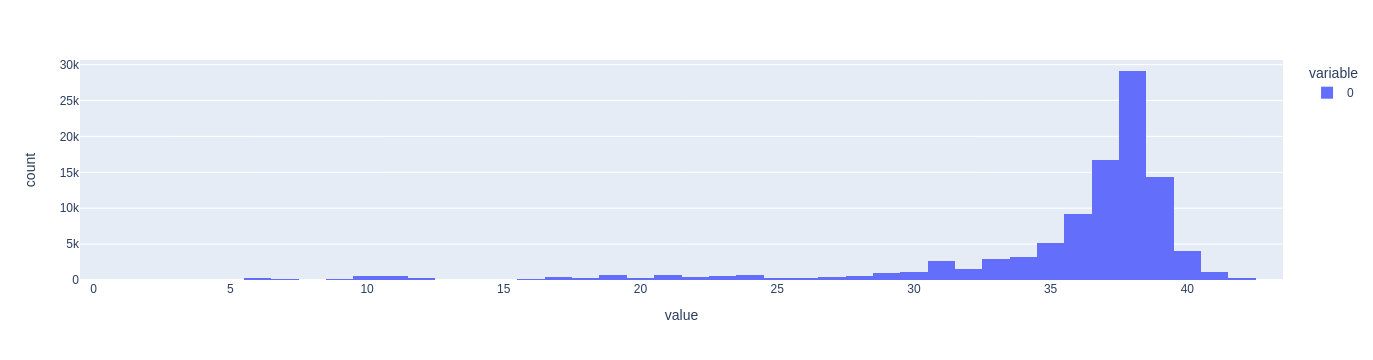

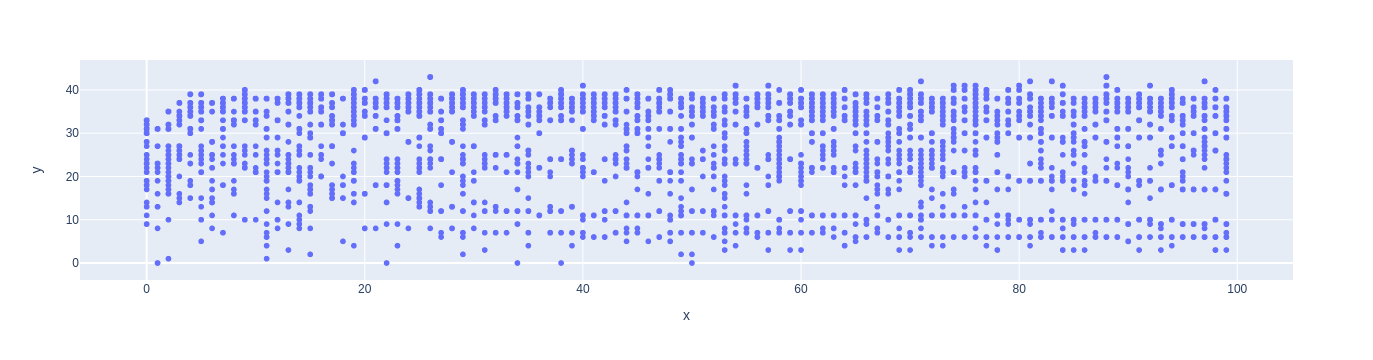

In [105]:
#get histogram of quals

indices= []
base_quals = []
for read_qual in quals: #this will look at each read 
    i= 0
    for base_qual in read_qual:
        indices.append(i)
        base_quals.append(phred33toQ(base_qual))
        i +=1
fig1 = px.histogram(base_quals, width = 500)
fig1.show()
fig2  = px.scatter(x= indices,y = base_quals, width = 500)
fig2.show()

(array([4.6000e+01, 3.8300e+02, 1.5300e+03, 6.3900e+02, 1.8270e+03,
        2.0230e+03, 3.2160e+03, 1.0225e+04, 6.0213e+04, 1.9898e+04]),
 array([ 0. ,  4.3,  8.6, 12.9, 17.2, 21.5, 25.8, 30.1, 34.4, 38.7, 43. ]),
 <BarContainer object of 10 artists>)

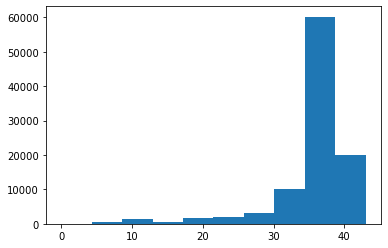

In [97]:
plt.hist(base_quals)

### Finding GC content by position

In [106]:
len(seqs)

1000

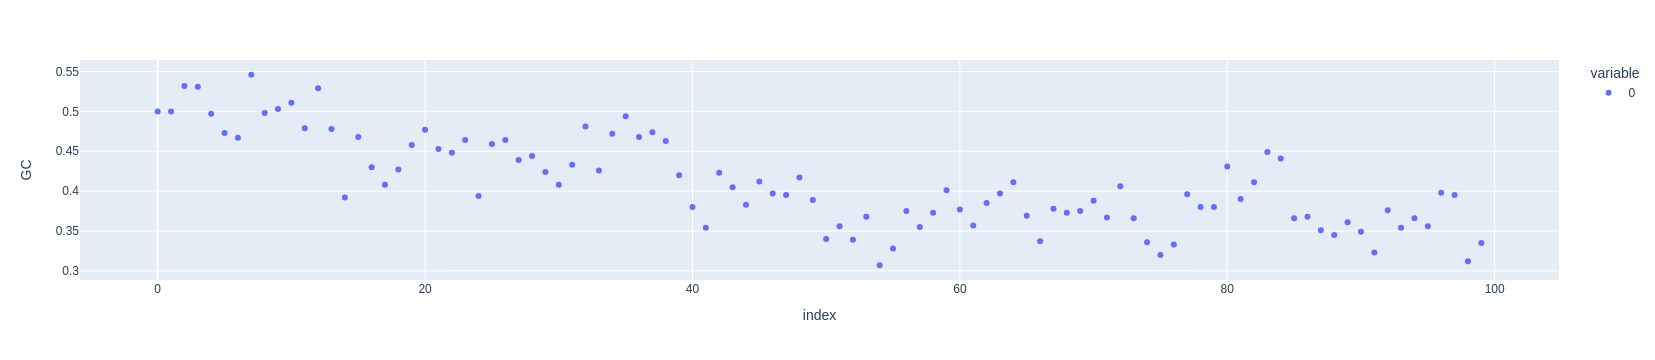

In [132]:
def findGCByPos(reads): #finds average GC content (over all reads??) for cumulative up to specified position/...who would use this 
    gc = [0] * 100 # makes a list of 100 zeroes
    totals =  [0] * 100
    for read in reads: #for each read
        for i in range(len(read)): #run though the read and increment both GC and total count
            if read[i] == 'C' or read[i] == 'G':
                gc[i] +=1 #will increment the GC count 
            totals[i] +=1 # will increment the total count
    for i in range(len(gc)):
        if totals[i] >0:
            gc[i] /= float(totals[i])
    return gc


gc = findGCByPos(seqs)
px.scatter(gc, labels ={'value':'GC'}, width = 500)

In [134]:
counts= {'A':0, 'T':0, 'G':0,'C':0}
for seq in seqs:
    counts.update(seq)

ValueError: dictionary update sequence element #0 has length 1; 2 is required

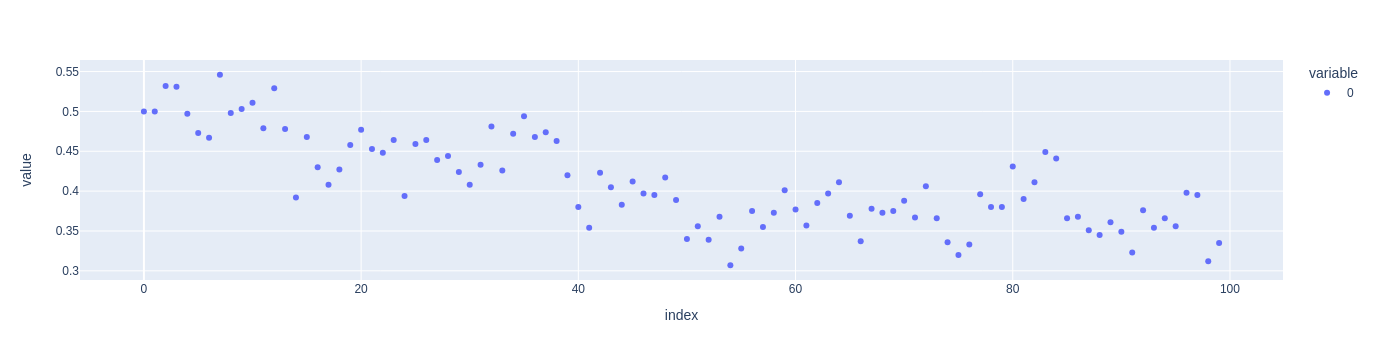

## Alignment  - Naive Exact Matching

In [11]:
# finding the offset of a pattern
t = 'The %%ai magic works anywhere the IPython kernel runs, including JupyterLab, Jupyter Notebook, Google Colab, and Visual Studio Code.'
t.find('code') #gives the last index of the first occurence of the word 

#what's an algorithm for exact matching? 
def naive(p,t): #looks for pattern p in text
    occurences = []
    for i in range(len(t)-len(p) + 1): # loop over all alignments
        #print(i)
        match = True
        for j in range(len(p)): #loop over chars in pattern p 
            if t[i+j] != p[j]: #if index in t isn't p
                match  = False
                break
        if match:
            occurences.append(i)
    return occurences 

naive('Code',t)

# try every possible offset (check each substring to see if it matches )

[127]

In [3]:
pip install jupyter-ai

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 929.3/929.3 kB 13.5 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.8 MB/s eta 0:00:0031m31.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.1 MB/s eta 0:00:0031m27.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 28.3 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.0 MB/s eta 0:00:0031m50.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━

### using naive exact matching to align reads to a genome


In [56]:
reverse_complement('ATT')

'AAT'

In [7]:
def reverse_complement(seq):
    complement = {'A':'T', 'T':'A','G':'C', 'C':'G', 'N':'N'}
    t = ''
    for base in seq:
        t = complement[base] + t 
    return t

def read_fastq(filename):
    sequences = []
    qualities = []
    with open(filename,'r') as fh:
        while True: #while file is reading lines 
            fh.readline() #first line is descriptor
            seq = fh.readline().rstrip() # second is sequence
            fh.readline() #third is spaceholder
            qual = fh.readline().rstrip() #4th is quality 
            if len(seq)  == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [20]:
reads, quals = read_fastq('ERR266411_1.first1000.fastq') #not actually sure if these reads are from this genome - there was some weird stuff in the downloads


In [67]:
num_matched = 0 #number of reads that match exactly
n = 0

for read in reads:
    r = read[:10] #take a subset of the read 
    
    
    matches = naive(r, genome) #checking if first 30bp match
    matches.extend(naive(reverse_complement(r),genome)) #this adds a check for reverse complement to matches
    n +=1 
    if len(matches)>0: #if we get more than 1 match then increment num_matched
        num_matched +=1 

print ('fraction matching exactly = ', (num_matched/n))

fraction matching exactly =  0.169


## Quiz

In [71]:
#Which of the following is not a substring of GCTCAGCGGGGCA?

substrings = ['GCG','GCT','GCC','GCA']
string  = 'GCTCAGCGGGGCA'

for substring in substrings:
    if string.find(substring) == False:
        print (substring)

GCT


## Programming homework

First, implement a version of the naive exact matching algorithm that is strand-aware. That is, instead of looking only for occurrences of P in T, additionally look for occurrences of thereverse complement of P in T. If P is ACT, your function should find occurrences of both ACTand its reverse complement AGT in T.

If P and its reverse complement are identical (e.g. AACGTT), then a given match offset should be reported only once. So if your new function is called naive_with_rc, then the old naivefunction and your new naive_with_rc function should return the same results when P equals its reverse complement.

In [9]:
text1 = 'CGAGCTTGCGCAAGGATAGGTCGAATTTTCTCATTTTCCGCCAGCAGTCCACTTCGATTTAATTCGTAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATATCTTGATAAAGCAGGAATTACTACTGCTTGTTTACGAATTAAATCGAAGTGGACTGCTGGCGGAAAATGAGAAAATTCGACCTATCCTTGCGCAGCTCG'
text2 = 'AACGTTAACGTTAACGTT' #contains an identical reverse complement: palindromes 

In [10]:
def naive_with_rc(p,t): #looks for pattern p in text
    occurences = []
    p_rc  = reverse_complement(p) #generate reverse complement
    if p == p_rc:
        #look only for forward
        query_list = [p]
    else: #look for both forward and reverse 
        query_list = [p,p_rc]
    for p in query_list:
        print(p)
        for i in range(len(t)-len(p) + 1): # loop over all alignments
            #print(i)
            match = True
            for j in range(len(p)): #loop over chars in pattern p 
                if t[i+j] != p[j]: #if index in t isn't p
                    match  = False
                    break
            if match:
                occurences.append(i)
    return occurences 


a = naive_with_rc('AACGTT',text2)
b = naive('AACGTT',text2)

AACGTT


NameError: name 'naive' is not defined

In [152]:
print (a,b)

[0, 6, 12] [0, 6, 12]


## homework quiz

In [63]:
! wget 'https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa'
genome = read_genome('lambda_virus.fa')

--2024-03-25 09:41:10--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.155.188.170, 18.155.188.175, 18.155.188.167, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.155.188.170|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa.3’

lambda_virus.fa.3   100%[===================>]  48.12K  --.-KB/s    in 0.06s   

2024-03-25 09:41:11 (780 KB/s) - ‘lambda_virus.fa.3’ saved [49270/49270]



#### Question 1
How many times does 
AGGT
AGGT or its reverse complement (
ACCT
ACCT) occur in the lambda virus genome?  E.g. if 
AGGT
AGGT occurs 10 times and 
ACCT
ACCT occurs 12 times, you should report 22.

In [72]:
a = naive_with_rc('AGGT', genome)
#a = naive('AGTCGA', genome)
print(len(a))

AGGT
ACCT
306


#### Question 2
How many times does 
TTAA
TTAA or its reverse complement occur in the lambda virus genome?  

Hint: 
TTAA
TTAA and its reverse complement are equal, so remember not to double count.

In [73]:
a = naive_with_rc('AGGT', genome)
#a = naive('AGTCGA', genome)
print(len(a))

TTAA
195


#### Question 3
What is the offset of the leftmost occurrence of 
ACTAAGT
ACTAAGT or its reverse complement in the Lambda virus genome?  E.g. if the leftmost occurrence of 
ACTAAGT
ACTAAGT is at offset 40 (0-based) and the leftmost occurrence of its reverse complement 
ACTTAGT
ACTTAGT is at offset 29, then report 29.

In [77]:
a = naive_with_rc('ACTAAGT', genome)
#a = naive('AGTCGA', genome)
print(len(a))
a
min(a)

ACTAAGT
ACTTAGT
3


26028

#### Question 4
What is the offset of the leftmost occurrence of 
AGTCGA
AGTCGA or its reverse complement in the Lambda virus genome?



In [79]:
a = naive_with_rc('AGTCGA', genome)
#a = naive('AGTCGA', genome)
print(len(a))
min(a)

AGTCGA
TCGACT
9


450

#### Question 5

As we will discuss, sometimes we would like to find approximate matches for P in T. That is, we want to find occurrences with one or more differences.

For Questions 5 and 6, make a new version of the 
naive
naive function called 
naive_2mm
naive_2mm that allows up to 2 mismatches per occurrence. Unlike for the previous questions, do not consider the reverse complement here.  We're looking for approximate matches for P itself, not its reverse complement.

￼

For example, 
ACTTTA
ACTTTA occurs twice in 
ACTTACTTGATAAAGT
ACTTACTTGATAAAGT, once at offset 0 with 2 mismatches, and once at offset 4 with 1 mismatch. So 
naive_2mm('ACTTTA', 'ACTTACTTGATAAAGT')
naive_2mm(’ACTTTA’, ’ACTTACTTGATAAAGT’) should return the list 
[0, 4]
[0, 4].

Hint: See 
 this notebook http://nbviewer.ipython.org/github/BenLangmead/ads1-hw-examples/blob/master/hw1_naive_2mm.ipynb
 for a few examples you can use to test your 
naive_2mm
naive_2mm function.

How many times does 
TTCAAGCC
TTCAAGCC occur in the Lambda virus genome when allowing up to 2 mismatches? 

In [82]:
#what's an algorithm for exact matching? 


# a dumb way to do this would be to generate all sequences with up to n mismatches - wow that's a lot! 
# is there a way to do it more efficiently? 


def naive_2mm(p,t, mismatch_tolerance): #looks for pattern p in text
    occurences = []
    for i in range(len(t)-len(p) + 1): # loop over all alignments
        mismatches = 0 
        for j in range(len(p)): #loop over chars in pattern p 
            if t[i+j] != p[j]: #if index in t isn't p
                mismatches += 1 
        if mismatches <= mismatch_tolerance:
            occurences.append(i) 
    return occurences 

In [83]:
query = 'ATG'
text = 'ACCATG'
a = naive_2mm('TTCAAGCC',genome,2)
len(a)

191

#### Question 6
What is the offset of the leftmost occurrence of 
AGGAGGTT
AGGAGGTT in the Lambda virus genome when allowing up to 2 mismatches?

In [91]:
a = naive_2mm('AGGAGGTT',genome,2)
len(a)
min(a)


genome[49:(49+len('AGGAGGTT'))]

'AGGCGTTT'

In [92]:
49+len('AGGAGGTT')

57

### final quiz question

### Description
Note that the file has many reads in it and you should examine all of them together when answering this question.  The reads are taken from this study:

Ajay, S. S., Parker, S. C., Abaan, H. O., Fajardo, K. V. F., & Margulies, E. H. (2011). Accurate

and comprehensive sequencing of personal genomes. Genome research, 21(9), 1498-1505. 

This dataset has something wrong with it; one of the sequencing cycles is poor quality.

Report which sequencing cycle has the problem.  Remember that a sequencing cycle corresponds to a particular offset in all the reads. For example, if the leftmost read position seems to have a problem consistently across reads, report 0. If the fourth position from the left has the problem, report 3. Do whatever analysis you think is needed to identify the bad cycle. It might help to review the "Analyzing reads by position" video.

In [1]:
!wget 'https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq'

--2024-03-25 09:20:33--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.155.188.60, 18.155.188.175, 18.155.188.170, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.155.188.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘ERR037900_1.first1000.fastq’

ERR037900_1.first10 100%[===================>] 235.96K  1.24MB/s    in 0.2s    

2024-03-25 09:20:34 (1.24 MB/s) - ‘ERR037900_1.first1000.fastq’ saved [241626/241626]



In [23]:
seqs, phreds = read_fastq('ERR037900_1.first1000.fastq')
print ('there are', len(seqs), 'sequences in this ERR037900_1.first1000.fastq')

there are 1000 sequences in this ERR037900_1.first1000.fastq


(array([   0.,    0.,    0.,    0.,    0., 1000.,    0.,    0.,    0.,
           0.]),
 array([ 99.5,  99.6,  99.7,  99.8,  99.9, 100. , 100.1, 100.2, 100.3,
        100.4, 100.5]),
 <BarContainer object of 10 artists>)

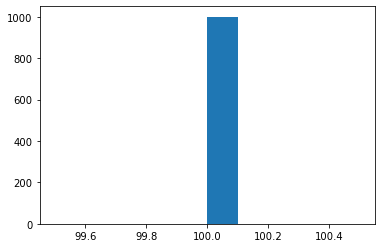

In [18]:
# let's check the dist of read length
plt.hist([len(seq) for seq in seqs]) #all 100bp

### checking read quality

In [27]:
quals = []
for phred in phreds:
    qual_list = []
    for phred_char in phred:
        qual_list.append(Phred33toQ(phred_char))
    quals.append(qual_list)

In [60]:
df = pd.DataFrame(quals).melt()
df.columns = ['position','score']
group = df.groupby('position').agg(['mean','std'])


group.columns = group.columns.map('_'.join)
group = group.reset_index()

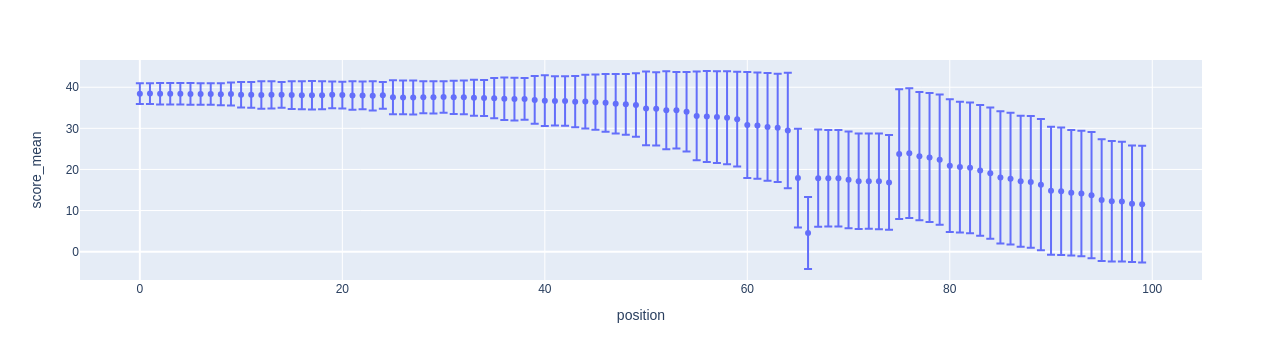

In [62]:
px.scatter(group, x = 'position', y = 'score_mean', error_y='score_std')

# Module 2: Preprocessing, indexing, and exact matching

## Algorithms for more efficient matchign

### Naive exact matching


In [2]:
def naive(p,t): #looks for pattern p in text
    occurences = []
    for i in range(len(t)-len(p) + 1): # loop over all alignments
        #print(i)
        match = True
        for j in range(len(p)): #loop over chars in pattern p 
            if t[i+j] != p[j]: #if index in t isn't p
                match  = False
                break
        if match:
            occurences.append(i)
    return occurences 

p = 'cde'
t = 'abcdefgh'
naive(p,t)

[2]

### Boyer-Moore 
- Skips many alignments that are unneccesary
- Learn from unfruitful character comparisons to skip pointless alignments; alignments in left to right, but character comparisons in right to left
- Bad character rule: upon mismatch, skip alignments until mismatch becomes a match, or pattern p moves past mismatched character
- Good suffix rule: t is a substring suffix in T that is matched; skip alignments until there are no mismatches between p and t (basically, shift p so no matches turn into mis-matches )


#### boyer-moore pseudocode
1. Align P over T from left to right
2. Make character comparisons
3. If character matches, continue
4. If character mismatches, take max between bad char and good suffix rule

#### bad character 
- check if misatch occurs at i in t and j in p
- if not, continue to j-1/i-1
- if yes, find the the j that matches i, and skip alignments between


#### good suffix 
- when mismatch is found
- define suffix by slicing from mismatch +1:end of pattern 
- find next offset of suffix
- shift accordingling

In [35]:
# t_i is the letter at position i
# j is the offset we are currently at in pattern

# T, P are the text and pattern
# i, j are the respective indices
# Ti and Pj are the characters at each index 

def bad_character(Ti,j,pattern): 
    next_offset = pattern.rfind(Ti,0,j) # looks in pattern for Ti, from j to j=0
    if next_offset > 0: #if the next Ti was found in P, shift number ip to that of char comparisons between 
        shift = j - next_offset
    else: #if not, shift remainder of p 
        shift = len(pattern) - len(pattern[j:])
    return(shift)


def good_suffix(j, pattern):
    suffix = pattern[j+1:]
    next_suffix_offset = pattern.rfind(suffix,0,j+1) # this returns -1
    if next_suffix_offset > 0:
        shift = j+1 - next_suffix_offset
    else:
        shift  = len(pattern) - 1
    print('the good suffix is:', suffix)
    return(shift)
    
#good_suffix(5,pattern)

#### setting up boyer-moore

In [78]:
def bm(P,T): #looks for pattern p in text
    occurences = []
    i = 0
    alignment_region = len(T)-len(P) + 1
    while i <  alignment_region: # perform alignments from left to right 
        #print('i=',i)
        print('\n')
        print('position(i) is:',i)
        match = True
        
        for j in list(range(len(P)))[::-1]: #loop over chars in pattern p
            #print(j)
            #print('j=',j)
            #print('t=', t[i+j], 'p=', p[j])
            if T[i+j] != P[j]: #if index in t isn't p
                print ('mismatch_location on text (i+j) =',i+j)
                match  = False
                #then apply the bad character rule 
                a = bad_character(T[i+j],j,P) 
                print('mismatch location on pattern j =' ,j)
                b = good_suffix(j,P)
                print('the bad character rule shifts',a, 'such that the next alignment will occur at Pi = ', i+a)
                print('the good suffix rule shifts', b, 'such that the next alignment will occur at Pi = ', i+b)
                skip = max([a,b])
                i+=skip-1 #this needs to be -1, because there is always a +1 added on the round, regardless of the match outcome 
                break
        print(match)
        if match:
            occurences.append(i)
        i+=1
    return occurences 



text =    'GCTATAATGCGTA'
pattern = 'TAATAAA'
bm(pattern,text)



position(i) is: 0
mismatch_location on text (i+j) = 4
mismatch location on pattern j = 4
the good suffix is: AA
the bad character rule shifts 1 such that the next alignment will occur at Pi =  1
the good suffix rule shifts 4 such that the next alignment will occur at Pi =  4
False


position(i) is: 4
mismatch_location on text (i+j) = 10
mismatch location on pattern j = 6
the good suffix is: 
the bad character rule shifts 6 such that the next alignment will occur at Pi =  10
the good suffix rule shifts 0 such that the next alignment will occur at Pi =  4
False


[]

### Pre-processing

- True Boyer-Moore uses pre-processing to make lookup tables to find suffixes/bad characters (but does not pre-process the text T)
- An algorithm that pre-processes is called offline
- A couple of analogies for this; index like in an encyclopedia, or the grocery store where things are organize by aisle (grouping)

In [13]:
example_gene = 'ATGGTGCACCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTGAACGTGGATGAAGTTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCCCTGGGCAGGTTCTATTGGTCTATTTTCCCACCCTTAGGCTGAAAGAAGTCACCGTGCCCAGTTTCTATTGGTGGTGAGGCC'

#### building an example index of text t (my own code)

In [14]:
from collections import defaultdict

kmer_dict = defaultdict(list) # Initialize the defaultdict with list as the default factory
kmer_list = []
for i in range(0,len(text)-4):
    kmer = text[i:i+5]
    kmer_dict[kmer].append(i)
kmer_dict

NameError: name 'text' is not defined

#### Building an example index using examples from lecture

##### ordering
- take all kmers
- order them
- 

In [20]:
def gen_kmers(string,kmer_length):
    list_kmer = []
    for i in range(0, len(string) - kmer_length + 1):
        kmer = string[i:i + kmer_length]
        list_kmer.append([kmer,i])
    list_kmer.sort()
    list_kmer = np.array(list_kmer)
    return(list_kmer)
    

kmer_index = gen_kmers(example_gene,3)
kmer_index[0:10]

array([['AAA', '125'],
       ['AAA', '206'],
       ['AAA', '287'],
       ['AAA', '368'],
       ['AAA', '449'],
       ['AAA', '530'],
       ['AAA', '611'],
       ['AAA', '692'],
       ['AAA', '773'],
       ['AAA', '854']], dtype='<U21')

#### bisecting the list 


In [28]:
np.shape(kmer_index)
a = list(kmer_index[:,0]) #slice all rows, first column
a[:5]
len(a)

2836

In [29]:
import bisect

bisect.bisect_left(a,'ATG')

388

#### Hash table - another data structure to represent multimaps

The next data structure we can use to implement a multi-map is a hash table. Hash tables are extremely versatile, efficient, and widely used data structures. They are more or less the standard data structure used to represent sets and maps in practice. So let's walk through an example where we're going to use a hash table to implement the same kind of multi-map that we implemented before using an ordered list of pairs.

1. Map 3-mers to empty buckets, which then become lists, via hash function
2. Python dictionaries ARE hash tables




#### Approximate matching and Hamming edit distance

Edit (levenshtein) distance: # of edits (indels, subs) to make two sequences the same 

Hamming distance: # of subs needed 

In [15]:
def hamming(p,t, mismatch_threshold): #looks for pattern p in text
    occurences = []
    for i in range(len(t)-len(p) + 1): # loop over all alignments
        #print(i)
        match = True
        mismatches = 0 
        for j in range(len(p)): #loop over chars in pattern p 
            if t[i+j] != p[j]: #if index in t isn't p
                mismatches +=1 
                if mismatches > mismatch_threshold:
                    match = False
                    break
        if match:
            occurences.append(i)
    return mismatches

p = 'cde'
t = 'abcdefgh'
mismatch_threshold = 3
hamming(p,t, mismatch_threshold)

3

#### Variations on k-mer indexes; sub-sequences

- example: take only odd k-mers (cuts index size in half, faster) - Does cause a miss in matches? It can; but we canquery different kmers from the query (doubling the # of queries)
- Can generalize this to not every *other* kmer, but to everything 3rd, 4th, nth kmer (this means you need to do n queries)

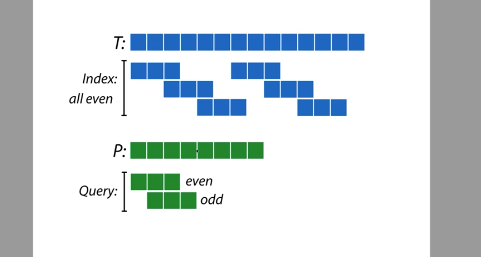

In [23]:
Image(filename = 'subsequences.png')

##### another variation is to do sub*sequences* of text
- a subsequence contains characters that occur in the sequence, in order,but not necessarily adjacent
- Take the same shape from T and from P as query
- Advantages: increases specificty of the filter, disadvantages 


In [ ]:
#### Pigeonhole principle 

### break in lectures - jumping to quiz 

## Quiz

### Setup

Measuring Boyer-Moore's benefit. First, download the Python module for Boyer-Moore preprocessing:

http://d28rh4a8wq0iu5.cloudfront.net/ads1/code/bm_preproc.py

This module provides the BoyerMoore class, which encapsulates the preprocessing info used by the boyer_moore function above. Second, download the provided excerpt of human chromosome 1:

http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/chr1.GRCh38.excerpt.fasta

Third, implement versions of the naive exact matching and Boyer-Moore algorithms that additionally count and return (a) the number of character comparisons performed and (b) the number of alignments tried. Roughly speaking, these measure how much work the two different algorithms are doing.

For a few examples to help you test if your enhanced versions of the naive exact matching and Boyer-Moore algorithms are working properly, see these notebooks:

Naive

Boyer-Moore

### importing the functions



In [3]:
read_genome

<function genome_functions.read_genome(filename)>

Implement versions of the naive exact matching and Boyer-Moore algorithms that additionally count and return (a) the number of character comparisons performed and (b) the number of alignments tried. Roughly speaking, these measure how much work the two different algorithms are doing.



In [4]:
# reading in the fasta
genome = read_genome('chr1.GRCh38.excerpt.fasta')
query = ''


### Question 1
How many alignments does the naive exact matching algorithm try when matching the string 
GGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGG
GGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGG (derived from human Alu sequences) to the excerpt of human chromosome 1?  (Don't consider reverse complements.)

### Question 2
How many character comparisons does the naive exact matching algorithm try when matching the string 
GGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGG (derived from human Alu sequences) to the excerpt of human chromosome 1?  (Don't consider reverse complements.)

### Question 3

How many alignments does Boyer-Moore try when matching the string 
GGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGG (derived from human Alu sequences) to the excerpt of human chromosome 1?  (Don't consider reverse complements.)

In [5]:
query = 'GGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGG'
naive(query, genome)

testing
number of alignments: 799954
number of comparisons: 984143


[56922]

In [8]:
def boyer_moore(p, p_bm, t):
    """ Do Boyer-Moore matching. p=pattern, t=text,
        p_bm=BoyerMoore object for p """
    i = 0
    occurrences = []
    num_alignments = 0
    num_comparisons = 0
    while i < len(t) - len(p) + 1:
        num_alignments += 1
        shift = 1
        mismatched = False
        for j in range(len(p)-1, -1, -1):
            num_comparisons += 1
            if p[j] != t[i+j]:
                skip_bc = p_bm.bad_character_rule(j, t[i+j])
                skip_gs = p_bm.good_suffix_rule(j)
                shift = max(shift, skip_bc, skip_gs)
                mismatched = True
                break
        if not mismatched:
            occurrences.append(i)
            skip_gs = p_bm.match_skip()
            shift = max(shift, skip_gs)
        i += shift
    print('number of alignments:', num_alignments)
    print('number of comparisons:', num_comparisons)
    return occurrences


In [9]:

query_bm = BoyerMoore(query)
boyer_moore(query, query_bm,genome)

number of alignments: 127974
number of comparisons: 165191


[56922]

### question 4: 
In practicals, we built a Python class called Index (below): 


We also implemented the pigeonhole principle using Boyer-Moore as our exact matching algorithm.

Implement the pigeonhole principle using Index to find matches for the partitions. Assume P always has length 24, and that we are looking for approximate matches with up to 2 mismatches (substitutions). We will use an 8-mer index.

Download the Python module for building a k-mer index. 

https://d28rh4a8wq0iu5.cloudfront.net/ads1/code/kmer_index.py

Write a function that, given a length-24 pattern P and given an 
Index
Index object built on 8-mers, finds all approximate occurrences of P within T with up to 2 mismatches. Insertions and deletions are not allowed. Don't consider any reverse complements.

How many times does the string GGCGCGGTGGCTCACGCCTGTAAT, which is derived from a human Alu sequence, occur with up to 2 substitutions in the excerpt of human chromosome 1?  (Don't consider reverse complements here.)

Hint 1: Multiple index hits might direct you to the same match multiple times, but be careful not to count a match more than once.

Hint 2: You can check your work by comparing the output of your new function to that of the 
naive_2mm
naive_2mm function implemented in the previous module.

In [11]:
def flatten_list_of_lists(list_of_lists):
    return [item for sublist in list_of_lists for item in sublist]
    
from kmer_index import Index
genome_index = Index(genome, 8)

p1 = 'GGCGCGGTGGCTCACGCCTGTAAT'[0:8]
p2 = 'GGCGCGGTGGCTCACGCCTGTAAT'[8:16]
p3 = 'GGCGCGGTGGCTCACGCCTGTAAT'[16:24]

offsets = []
for sub_p in [p1,p2,p3]:
    offsets.append(genome_index.query(sub_p))  # Return index hits for first k-mer of p 

    break


offsets = flatten_list_of_lists(offsets)
offsets_unique = list(set(offsets))

In [14]:
p = 'GGCGCGGTGGCTCACGCCTGTAAT'
permitted_mismatches = 2
num_partitions = permitted_mismatches + 1 

partition_length = len(p)//num_partitions
hit_list = []

for partition in range(0,num_partitions): 
    
    start = partition * partition_length
    stop = (partition + 1) * partition_length
    print("partition #", partition, start, stop)
    sub_p = p[start:stop]
    offsets = genome_index.query(sub_p)
    
    pattern_bases_preceding_offset = start 
    pattern_bases_following_offset = (len(p)-start)
    
    for offset in offsets:
        text = genome[offset - pattern_bases_preceding_offset:offset + pattern_bases_following_offset]
        hit = hamming(p,text,2)
        #print (partition, sub_p, offset, offset - pattern_bases_preceding_offset, offset + pattern_bases_following_offset, text, hit)
        hit_list.append([partition, sub_p, offset, offset - pattern_bases_preceding_offset, offset + pattern_bases_following_offset, text, hit])
        
df_hits = pd.DataFrame(hit_list, columns = ['query_seq', 'sub_p', 'offset', 'genome_start', 'genome_stop', 'genome_seq', '# mismatches'])  

#df_hits['hit']
#df_hits['hit'] = df_hits['hit'].apply(lambda x: '' if not x else 'hit')
df_hits

partition # 0 0 8
partition # 1 8 16
partition # 2 16 24


query_seq     sub_p  offset  genome_start  genome_stop  \
0           0  GGCGCGGT   56922         56922        56946   
1           0  GGCGCGGT   57056         57056        57080   
2           0  GGCGCGGT   83720         83720        83744   
3           0  GGCGCGGT   84641         84641        84665   
4           0  GGCGCGGT  147558        147558       147582   
..        ...       ...     ...           ...          ...   
85          2  CCTGTAAT  724943        724927       724951   
86          2  CCTGTAAT  746636        746620       746644   
87          2  CCTGTAAT  747375        747359       747383   
88          2  CCTGTAAT  747511        747495       747519   
89          2  CCTGTAAT  760505        760489       760513   

                  genome_seq  # mismatches  
0   GGCGCGGTGGCTCACGCCTGTAAT             0  
1   GGCGCGGTGGCAGGCGCCTGTAGT             3  
2   GGCGCGGTGATTCATGCCTGTAAT             3  
3   GGCGCGGTGGCTCATGCCTGTAAT             1  
4   GGCGCGGTGGCTCATGCCTGTAAT             1  
..                       ...           ...  
85  GGCACGGTGGCTCACGCCTGTAAT             1  
86  GGCGTGGTGGTTCATGCCTGTAAT             3  
87  GGCGTGGTGGTTCACGCCTGTAAT             2  
88  GGTGTGGTGACATGCACCTGTAAT             3  
89  AAACTGTTCCAAACTGCCTGTAAT             3  

[90 rows x 7 columns]

In [15]:
df_hits_deduplicated = df_hits.drop_duplicates(subset = 'genome_start')
df_final = df_hits_deduplicated[df_hits_deduplicated['# mismatches'] < 3 ]
df_final

query_seq     sub_p  offset  genome_start  genome_stop  \
0           0  GGCGCGGT   56922         56922        56946   
3           0  GGCGCGGT   84641         84641        84665   
4           0  GGCGCGGT  147558        147558       147582   
5           0  GGCGCGGT  160729        160729       160753   
6           0  GGCGCGGT  191452        191452       191476   
7           0  GGCGCGGT  262042        262042       262066   
8           0  GGCGCGGT  364263        364263       364287   
9           0  GGCGCGGT  657496        657496       657520   
10          0  GGCGCGGT  681737        681737       681761   
11          0  GGCGCGGT  717706        717706       717730   
15          1  GGCTCACG  160170        160162       160186   
17          1  GGCTCACG  273677        273669       273693   
20          1  GGCTCACG  421229        421221       421245   
21          1  GGCTCACG  429307        429299       429323   
22          1  GGCTCACG  465655        465647       465671   
25          1  GGCTCACG  551142        551134       551158   
29          1  GGCTCACG  724935        724927       724951   
76          2  CCTGTAAT  635947        635931       635955   
87          2  CCTGTAAT  747375        747359       747383   

                  genome_seq  # mismatches  
0   GGCGCGGTGGCTCACGCCTGTAAT             0  
3   GGCGCGGTGGCTCATGCCTGTAAT             1  
4   GGCGCGGTGGCTCATGCCTGTAAT             1  
5   GGCGCGGTGGCTCACACCTGTAAT             1  
6   GGCGCGGTGGTTCACGCCTGTAAT             1  
7   GGCGCGGTGGCTCACGCCTGTAAT             0  
8   GGCGCGGTGGCTCACGCCTGTAAT             0  
9   GGCGCGGTGGCTCACGCCTGTAAT             0  
10  GGCGCGGTGGCTCATGCCTGTAAT             1  
11  GGCGCGGTGGCTCACGCCTGTAAT             0  
15  GGCACGGTGGCTCACGCATGTAAT             2  
17  GGTGCGGTGGCTCACGCCTGTAAT             1  
20  GGCGCAATGGCTCACGCCTGTAAT             2  
21  AGCGCGGTGGCTCACGCCTGTAAT             1  
22  GGCGCAGTGGCTCACGCCTGTAAT             1  
25  GGGCCGGTGGCTCACGCCTGTAAT             2  
29  GGCACGGTGGCTCACGCCTGTAAT             1  
76  GGTGCGGTGGCTCATGCCTGTAAT             2  
87  GGCGTGGTGGTTCACGCCTGTAAT             2

In [16]:
print("the answer to qestion 4 is",len(df_final))
print("the answer to qestion 5 is",len(df_hits))

the answer to qestion 4 is 19
the answer to qestion 5 is 90


### question 6:
Question 6
Let's examine whether there is a benefit to using an index built using subsequences of T rather than substrings, as we discussed in the "Variations on k-mer indexes" video.  We'll consider subsequences involving every N characters.  For example, if we split 
ATATAT into two substring partitions, we would get partitions 
ATA (the first half) and 
TAT (second half).  But if we split 
ATATAT into two  subsequences  by taking every other character, we would get 
AAA (first, third and fifth characters) and 
TTT (second, fourth and sixth).

Another way to visualize this is using numbers to show how each character of P is allocated to a partition.  Splitting a length-6 pattern into two substrings could be represented as 
111222
111222, and splitting into two subsequences of every other character could be represented as 
121212
121212

The following class 
SubseqIndex is a more general implementation of 
Index that additionally handles subsequences. It only considers subsequences that take every Nth character:





In [86]:
import bisect
   
class SubseqIndex(object):
    """ Holds a subsequence index for a text T """
    
    def __init__(self, t, k, ival):
        """ Create index from all subsequences consisting of k characters
            spaced ival positions apart.  E.g., SubseqIndex("ATAT", 2, 2)
            extracts ("AA", 0) and ("TT", 1). """
        self.k = k  # num characters per subsequence extracted
        self.ival = ival  # space between them; 1=adjacent, 2=every other, etc
        self.index = []
        self.span = 1 + ival * (k - 1) #length of the substring that will be extracted from the original string t for each subsequence
        for i in range(len(t) - self.span + 1):  # for each subseq
            self.index.append((t[i:i+self.span:ival], i))  # add (subseq, offset)
        self.index.sort()  # alphabetize by subseq
    
    def query(self, p):
        """ Return index hits for first subseq of p """
        subseq = p[:self.span:self.ival]  # query with first subseq
        print(subseq)
        print('hi')
        i = bisect.bisect_left(self.index, (subseq, -1))  # binary search
        hits = []
        while i < len(self.index):  # collect matching index entries
            if self.index[i][0] != subseq:
                break
            hits.append(self.index[i][1])
            i += 1
        return  hits


In [84]:
k = 8
ival = 3
ind = SubseqIndex(genome, k, ival) #indexes the genome, with kmers of 8,using every 3rd char 
ind.query(pattern)

[('AAAAAAAA', 1879),
 ('AAAAAAAA', 1882),
 ('AAAAAAAA', 1885),
 ('AAAAAAAA', 1888),
 ('AAAAAAAA', 2989)]

In [30]:
p = 'TTATAT'
print(ind.query(p[1:]))

[1]


### Question 7:
Write a function that, given a length-24 pattern P and given a 
SubseqIndex object built with k = 8 and ival = 3, finds all approximate occurrences of P within T with up to 2 mismatches.

When using this function, how many total index hits are there when searching for 
GGCGCGGTGGCTCACGCCTGTAAT with up to 2 substitutions in the excerpt of human chromosome 1?  (Again, don't consider reverse complements.)

Hint: See 
this notebook for a few examples
 you can use to test your function.

In [76]:
# split a pattern into k =8 and ival = 3 

def create_array(x, m ,n):
    result = []
    for i in range(n):
        result.append(x + i * m)  # Add the value (x + i * m) to the array
    return result

def extract_characters(s, indices):
    result = ''.join(s[i] for i in indices if i < len(s))
    return result

for start_offset in range(0,ival):
    offsets = create_array(start_offset, ival, k)
    subseq = extract_characters(pattern, offsets)
    print(start_offset, offsets, subseq)
    #ind.query(subseq)



0 [0, 3, 6, 9, 12, 15, 18, 21] GGGGCGTA
1 [1, 4, 7, 10, 13, 16, 19, 22] GCTCACGA
2 [2, 5, 8, 11, 14, 17, 20, 23] CGGTCCTT


## take 2

In [98]:
import bisect
   
class SubseqIndex(object):
    """ Holds a subsequence index for a text T """
    
    def __init__(self, t, k, ival):
        """ Create index from all subsequences consisting of k characters
            spaced ival positions apart.  E.g., SubseqIndex("ATAT", 2, 2)
            extracts ("AA", 0) and ("TT", 1). """
        self.k = k  # num characters per subsequence extracted
        self.ival = ival  # space between them; 1=adjacent, 2=every other, etc
        self.index = []
        self.span = 1 + ival * (k - 1) #length of the substring that will be extracted from the original string t for each subsequence
        for i in range(len(t) - self.span + 1):  # for each subseq
            self.index.append((t[i:i+self.span:ival], i))  # add (subseq, offset)
        self.index.sort()  # alphabetize by subseq
    
    def query(self, p, ival):
        """ Return index hits for first subseq of p """
        all_hits = []
        for start_offset in range(0,ival):
            print (start_offset)
            subseq = p[start_offset:self.span+start_offset:self.ival]  # query with first subseq
            print(subseq)
            print('hi')
            i = bisect.bisect_left(self.index, (subseq, -1))  # binary search
            hits = []
            while i < len(self.index):  # collect matching index entries
                if self.index[i][0] != subseq:
                    break
                hits.append(self.index[i][1]-start_offset)
                i += 1
            all_hits.append(hits)
        return all_hits


pattern = 'GGCGCGGTGGCTCACGCCTGTAAT'
k = 8
ival = 3
ind = SubseqIndex(genome, k, ival) #indexes the genome, with kmers of 8,using every 3rd char 
hits = ind.query(pattern, ival)

0
GGGGCGTA
hi
1
GCTCACGA
hi
2
CGGTCCTT
hi


In [110]:
hits_flat = flatten_list_of_lists(hits)

alignment_results = []
for offset in hits_flat:
        text = genome[offset:offset+len(pattern)]
        hit = hamming(pattern,text,2)
        #print (partition, sub_p, offset, offset - pattern_bases_preceding_offset, offset + pattern_bases_following_offset, text, hit)
        alignment_results.append([offset, text, hit])
print(len(alignment_results))
alignment_results

79


[[56922, 'GGCGCGGTGGCTCACGCCTGTAAT', 0],
 [67486, 'GTTGTGGTGGCACGTGCCTGTAGT', 3],
 [83863, 'GGCGTGGTGGCGCGTGCCTGTAAT', 3],
 [84641, 'GGCGCGGTGGCTCATGCCTGTAAT', 1],
 [84775, 'GGCGTGGTGGCACATGCCTGTAAT', 3],
 [124024, 'GGTGTGGTGGTTCAGGTCTGTAGT', 3],
 [147558, 'GGCGCGGTGGCTCATGCCTGTAAT', 1],
 [191452, 'GGCGCGGTGGTTCACGCCTGTAAT', 1],
 [199607, 'GGTGTGGTGGCGCATGCCTGTAGT', 3],
 [262042, 'GGCGCGGTGGCTCACGCCTGTAAT', 0],
 [262174, 'GGTGTGGTGGCACGTGCGTGTAAT', 3],
 [273669, 'GGTGCGGTGGCTCACGCCTGTAAT', 1],
 [322735, 'GGCGTGGTGGCGCATGCCTGTAAT', 3],
 [364263, 'GGCGCGGTGGCTCACGCCTGTAAT', 0],
 [421354, 'GGCGTGGTGGCACATGCCTGTAGT', 3],
 [454332, 'GGTGTGGTGGTGCATGCCTGTAAT', 3],
 [465647, 'GGCGCAGTGGCTCACGCCTGTAAT', 1],
 [471966, 'GTTGCGGTGGCTCATGCCTGTAAT', 3],
 [472634, 'GGTGCGGTGGCTCACGTCTGTAAC', 3],
 [489019, 'GCTGTGGAGGGGCTGGTTTTCAGT', 3],
 [558456, 'GATGTGGTGGAACTAGGTTAAAAC', 3],
 [579737, 'GGTGTGGTGGTTCATGCCTCTAAT', 3],
 [596898, 'GTGGGGGCTGGCCTGGTGTTGAGG', 3],
 [635931, 'GGTGCGGTGGCTCATGCCTGTAAT', 2

# Module 3: Edit Distance, Assembly, and Overlaps

## Lecture 1: Solving the edit distance problem

- A new family of methods using dynamic programming and edit distance used for many problems
- where edit distance is the nubmber of subs, insertions, deletions
- Algorithmically:


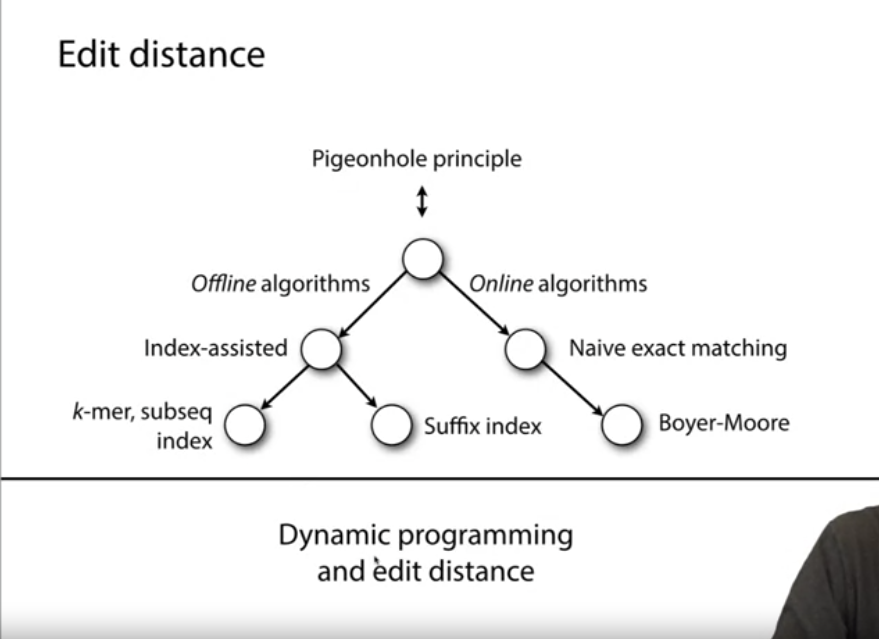

In [12]:
Image(filename = 'dp.png', height = 200, width = 400)

- it helps to know edit distance between prefixes (for some reason...not sure yet)
> - 

- Take the minimum of the following three terms:
>- The first is the edit distance between $a$ and $\beta$, +1
>- The second is editing $a$x into $\beta$ then add one edit (to remove x?)
>- the third is to edit $\beta$y into $a$ then add one

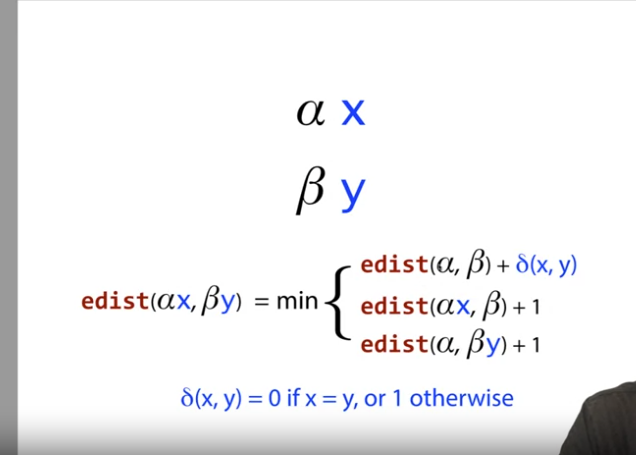

In [13]:
Image(filename = '/home/sam/Pictures/Screenshots/Screenshot from 2024-07-01 09-08-32.png', height = 200, width = 400)

A recursive alorithm for this is:

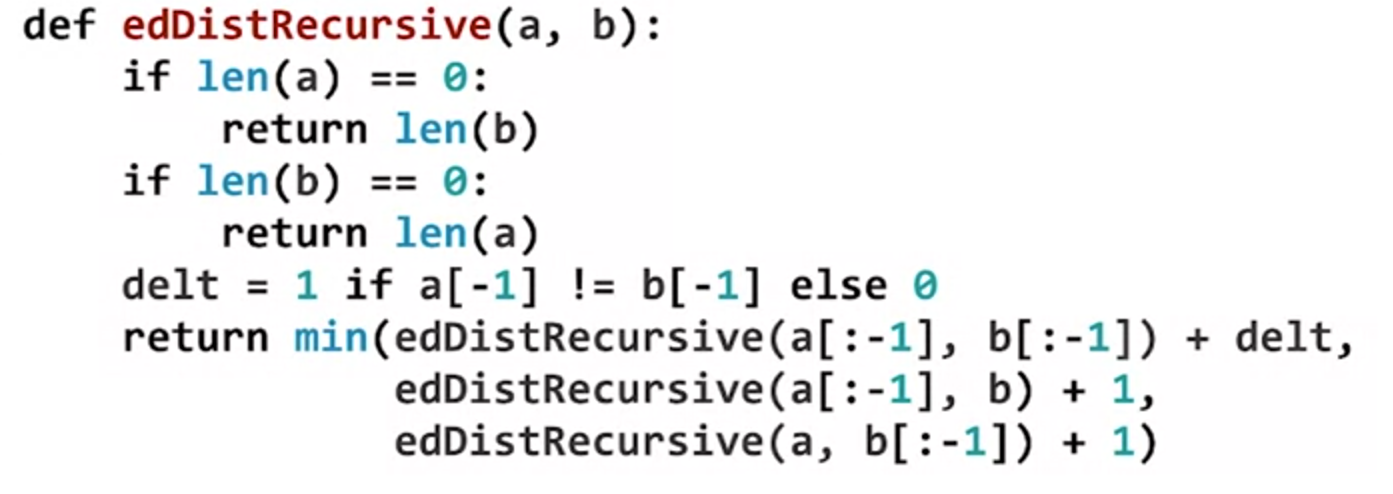

In [15]:
Image(filename = '/home/sam/Pictures/Screenshots/Screenshot from 2024-07-01 09-18-32.png', height = 200, width = 400)

#this is extremely slwo though 

## Lecture: Using dynamic programming for edit distance

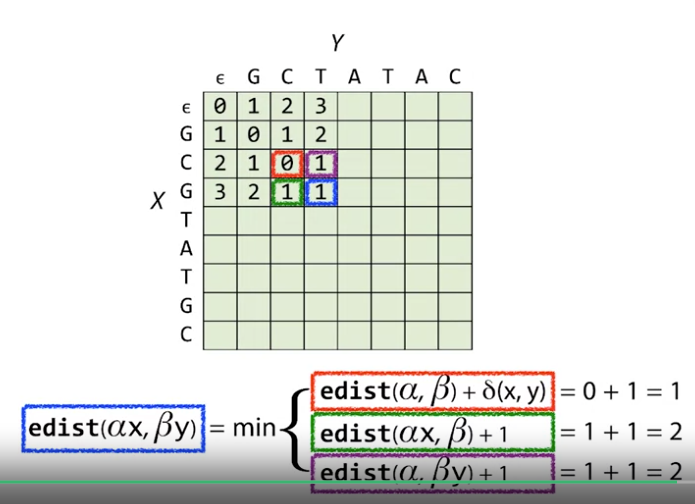

In [16]:
Image(filename = '/home/sam/Pictures/Screenshots/Screenshot from 2024-07-01 09-32-59.png', height = 200, width = 400)
# this is a much faster algorithm 

## Practical: Implementing dynamic programming for edit distance


In [86]:
# re-writing using dynamic programming

# going to create a matrix that we will fill in with the edit distances o

def editDistance(x,y):
    D = []
    
    #generate a matrix 
    for i in range(len(x) + 1): 
        D.append([0]*(len(y)+ 1))
    
    # instantiate i in the ith row, 0th column 
    for i in range(len(x) + 1):
        D[i][0] = i 
    
    #instantiate i in the first column, ith row 
    for i in range(len(y)+1):
        D[0][i] = i 

    # fill in the matrix 
    for i in  range (1, (len(x) + 1)):
        for j in range(1, len(y) + 1):
            distHor = D[i][j-1] + 1 #same row, previous column and then +1 for skip char
            distVer = D[i-1][j] +1 #previous row, same column then +1 for skip char
            if x[i-1] == y[j-1]: #if chars are the same
                distDiag = D[i-1][j-1] #then edit distance is unchanged from previous diagonal cell
            else:
                distDiag = D[i-1][j-1] + 1 #if they don't match, add edit dist 

            D[i][j] = min(distHor, distVer, distDiag)
    return D[-1][-1] #returns very bottom right value

In [74]:
%%time
x = 'shake spea'
y = 'Shakespear'

editDistance(x,y)

CPU times: user 94 µs, sys: 12 µs, total: 106 µs
Wall time: 113 µs


3

## Lecture: A new solution to approximate matching

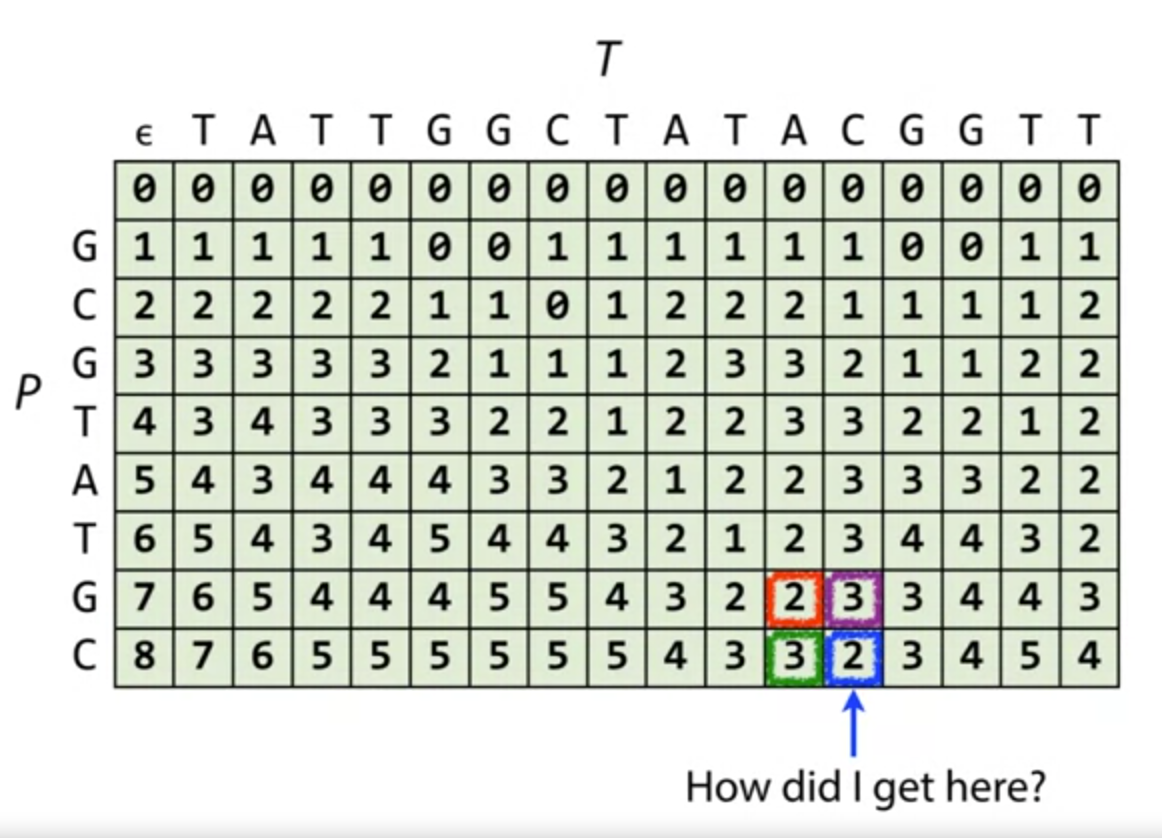

In [75]:
# now we want to do approximate matching 
# one change is that the matrix is initialized with all zeroes in the first row, because we don't know where p is going to occur in T and there's no bias towards anyoffset 
# the matrix is the filled in as before 
# in the final row, we find the lowest edit distance - this is the closest match


Image(filename = '/home/sam/Pictures/Screenshots/Screenshot from 2024-07-01 10-16-06.png', height = 200, width = 400)


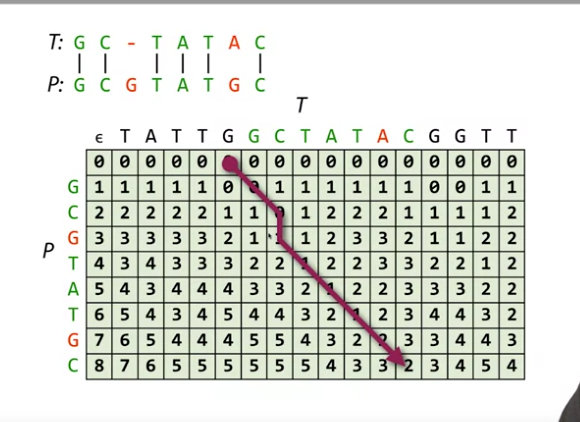

In [81]:
# but how do we find that match? 
    # find the min of the three previous values and work backwards #the traceback
    # this also helps us find the alignment 

#these can be slow algorithms; the amount of work is the lenP * lenT



Image(filename = '/home/sam/Pictures/Screenshots/Screenshot from 2024-07-01 10-21-26.png', height = 200, width = 400)


## Lecture: Meet the family: global and local alignment

In [160]:
# variations on the theme of dynamic programming for edit distance
# problem with edit distance; loss function is the same for everything. what if gaps should be penalized more? or certain substitutions are more likely than others? 
# this is actually true; transitions between A and G (purines) or T and C (pyrimidines) are about 2x more frequent than transversions 
# substitution rates between humans are about 1/1000 while indels are 1/3000 - perhaps indels should be penalized more?


### --- we want to weight the penalties using a penalty matrix 



#### global alignment

Global alignment aligns two sequences from beginning to end, trying to match as many characters as possible across the entire length of both sequences. It is most suitable for sequences that are of similar length and are expected to be similar over their entire length.

The Needleman-Wunsch algorithm is commonly used for global alignment

In [200]:
# adding weights for biolical problem at hand 
alphabet = ['A','C','G','T']
score = [[0,4,2,4,8], 
         [4,0,4,2,8],
         [2,4,0,4,8],
         [4,2,4,0,8],
         [8,8,8,8,8]] 


def global_alignment(x,y):
    D = []
    
    #generate a matrix 
    for i in range(len(x) + 1): 
        D.append([0]*(len(y)+ 1))
  
    # instantiate i in the ith row, 0th column 
    for i in range(1, len(x) + 1):
        D[i][0] = D[i-1][0] + score[alphabet.index(x[i-1])][-1] # looks in index for the previous character in X and gets that row, and then gets last cvalue in that row
    
    
    #instantiate i in the first column, ith row 
    for i in range(1, len(y)+1):
        D[0][i] = D[0][i-1] + score[-1][alphabet.index(y[i-1])]


    
    # fill in the matrix 
    for i in  range (1, (len(x) + 1)):
        for j in range(1, len(y) + 1):
            distHor = D[i][j-1] + score[-1][alphabet.index(y[j-1])] #get value from alphabet; last row, the column comes from y[j-1]
            distVer = D[i-1][j] + score[alphabet.index(x[i-1])][-1] #get value from alphabet; last column, the column comes from x[i-1]
            if x[i-1] == y[j-1]: #if chars are the same
                distDiag = D[i-1][j-1] 
            else:
                distDiag = D[i-1][j-1] + score[alphabet.index(x[i-1])][alphabet.index(y[j-1])] #get score  

            D[i][j] = min(distHor, distVer, distDiag)
    return D[-1][-1] #returns very bottom right value

In [202]:
x = 'TACCAGATTCGA'
y = 'TACCACATTCGA' 
global_alignment(x,x)

0

#### local alignment - here we are trying to find the most similar pair of substrings

Local alignment identifies regions of high similarity within long sequences that may be quite different overall. It finds the most similar subsequence between two sequences and aligns these regions. This is useful for finding conserved motifs or domains within otherwise divergent sequences.


This uses a scoring matrix, where matches are positive, while differences are given a *negative* difference

In [164]:
# adding weights for biolical problem at hand 

def local_alignment(x,y):
    D = []
    
    #generate a matrix 
    for i in range(len(x) + 1): 
        D.append([0]*(len(y)+ 1))
    
    # instantiate i in the ith row, 0th column 
    for i in range(len(x) + 1):
        D[i][0] = i 
    
    #instantiate i in the first column, ith row 
    for i in range(len(y)+1):
        D[0][i] = i 

    # fill in the matrix 
    for i in  range (1, (len(x) + 1)):
        for j in range(1, len(y) + 1):
            distHor = D[i][j-1] + 1 #same row, previous column and then +1 for skip char
            distVer = D[i-1][j] + 1 #previous row, same column then +1 for skip char
            if x[i-1] == y[j-1]: #if chars are the same
                distDiag = D[i-1][j-1] #then edit distance is unchanged from previous diagonal cell
            else:
                distDiag = D[i-1][j-1] + 1 #if they don't match, add edit dist 

            D[i][j] = min(distHor, distVer, distDiag)
    return D.max() #returns the maximum value 

## Practical: Overlaps between pairs of reads


In [9]:
def overlap(a,b,min_length = 3):
    start = 0 
    while True:
        #print(start)
        start = a.find(b[:min_length],start) #searches for prefix of b in a, updatese start with offset of a  
        if start == -1: #  if overlap isn't found
            return 0
        if b.startswith(a[start:]): #checks that suffix of a is a prefix of b 
            return len(a)-start
        start +=1


a = 'TTAACGT'
b = 'CGTACCGT'

overlap(a,b,3)

3

## Practical: Finding and representing all overlaps


In [233]:
from itertools import permutations
list(permutations([1,2,3],3)) #gives all permutations 



[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

In [239]:
def naive_overlap_map(reads,k):
    olaps = {}
    for a,b in permutations(reads, 2):
        olen = overlap(a, b, min_length=k)
        if olen > 0:
            olaps[(a,b,)] = olen
    return olaps


reads = ['ACGGATGATC', 'GATCAAGT', 'TTCACGGA']
naive_overlap_map(reads,3)

{('ACGGATGATC', 'GATCAAGT'): 4, ('TTCACGGA', 'ACGGATGATC'): 5}

## Quiz Module 3

In [ ]:

#1 Above, to the left, and to the upper-left
#2 traceback
#3 408
#4 lenP*lenT = |P|*|T|
#5 It finds similarities between substrings rather than between entire strings
#6 
#7
#8
#9
#10

# Programming Homework

We saw how to adapt dynamic programming to find approximate occurrences of a pattern in a text. Recall that:

Rows of the dynamic programming matrix are labeled with bases from P and columns with bases from T

Elements in the first row are set to 0

Elements in the first column are set to 0, 1, 2, ..., as for edit distance

Other elements are set in the same way as elements of a standard edit distance matrix

The minimal value in the bottom row is the edit distance of the closest match between P and T

First, download the provided excerpt of human chromosome 1

https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/chr1.GRCh38.excerpt.fasta

Second, parse it using the readGenome function we wrote before.

Third, adapt the editDistance function we saw in practical (copied below) to answer questions 1 and 2 below. Your function should take arguments p (pattern), t (text) and should return the edit distance of the match between P and T with the fewest edits.


Hint: In the "A new solution to approximate matching" video we saw that the best approximate match of P =GCGTATGC within T =TATTGGCTATACGGTT had 2 edits. You can use this and other small examples to double-check that your function is working.

In [155]:
!wget 'https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/chr1.GRCh38.excerpt.fasta'

--2024-07-01 12:34:01--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/chr1.GRCh38.excerpt.fasta
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.155.188.175, 18.155.188.60, 18.155.188.170, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.155.188.175|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 810105 (791K) [application/octet-stream]
Saving to: ‘chr1.GRCh38.excerpt.fasta.1’

chr1.GRCh38.excerpt 100%[===================>] 791.12K  3.92MB/s    in 0.2s    

2024-07-01 12:34:01 (3.92 MB/s) - ‘chr1.GRCh38.excerpt.fasta.1’ saved [810105/810105]



In [156]:
len(genome)

800000

In [157]:
genome = read_genome('chr1.GRCh38.excerpt.fasta')

### Question 1
What is the edit distance of the best match between pattern 
GCTGATCGATCGTACG and the excerpt of human chromosome 1?  (Don't consider reverse complements.)

In [158]:
pattern = "GCTGATCGATCGTACG" 
#editDistance(pattern,genome) #this compares the two string as a whole
# need something like
# index -> pidgeonhole -> edit distance 




#### solving with naive exact

In [149]:
def naive_edit(p,large_query): #looks for pattern p in text
    occurences = []
    for i in range(len(large_query)-len(p) + 1): # loop over all alignments
        t = large_query[i:i+len(p)] 
        edit_distance = editDistance(p,t)
        occurences.append([i, t, edit_distance])

    df = pd.DataFrame(occurences, columns  = ['i','t', 'edit_distance'])
    return df 

p = 'cde'
t = 'abcdefgh'
df = naive_edit(p,t)

In [240]:
df = naive_edit(pattern, genome)
df[df['edit_distance'] == df['edit_distance'].min()]

i                 t  edit_distance
380536  380536  GCTGATGGATAGTAAG              3

#### solving with indexing and kmers

In [159]:
#query kmers 
p = 'GCTGATCGATCGTACG'
permitted_mismatches = 5
num_partitions = permitted_mismatches + 1 



partition_length = len(p)//num_partitions
genome_index = Index(genome, partition_length)

hit_list = []

for partition in range(0,num_partitions): 
    
    start = partition * partition_length
    stop = (partition + 1) * partition_length
    #print("partition #", partition, start, stop)
    
    query_kmer = p[start:stop]
    offsets = genome_index.query(query_kmer)
    
    pattern_bases_preceding_offset = start 
    pattern_bases_following_offset = (len(p)-start)
    
    for offset in offsets:
        text = genome[offset - pattern_bases_preceding_offset:offset + pattern_bases_following_offset]
        #print(text)
        
        hit = editDistance(p,text)
        #print (partition, sub_p, offset, offset - pattern_bases_preceding_offset, offset + pattern_bases_following_offset, text, hit)
        hit_list.append([p, partition, query_kmer, offset, offset - pattern_bases_preceding_offset, offset + pattern_bases_following_offset, text, hit])

df_hits = pd.DataFrame(hit_list, columns = ['p','partition', 'query_kmer', 'offset', 'genome_start', 'genome_stop', 'genome_seq', 'edit_distance'])  
df_hits[df_hits['edit_distance'] == df_hits['edit_distance'].min()] 

p  partition query_kmer  offset  genome_start  \
12615   GCTGATCGATCGTACG          0         GC  380536        380536   
52827   GCTGATCGATCGTACG          1         TG  380538        380536   
118067  GCTGATCGATCGTACG          2         AT  380540        380536   
197396  GCTGATCGATCGTACG          4         AT  380544        380536   

        genome_stop        genome_seq  edit_distance  
12615        380552  GCTGATGGATAGTAAG              3  
52827        380552  GCTGATGGATAGTAAG              3  
118067       380552  GCTGATGGATAGTAAG              3  
197396       380552  GCTGATGGATAGTAAG              3

### Question 2
What is the edit distance of the best match between pattern 
GATTTACCAGATTGAG and the excerpt of human chromosome 1?  (Don't consider reverse complements.)

In [241]:
df = naive_edit('GATTTACCAGATTGAG', genome)
df[df['edit_distance'] == df['edit_distance'].min()]

i                 t  edit_distance
421071  421071  GATTTACCAAGATTGA              2

### Question 3
In a practical, we saw a function for finding the longest exact overlap (suffix/prefix match) between two strings. The function is copied below.

Say we are concerned only with overlaps that (a) are exact matches (no differences allowed), and (b) are at least k bases long. To make an overlap graph, we could call 
overlap(a, b, min_length=k) on every possible pair of reads from the dataset.  Unfortunately, that will be very slow!

Consider this: Say we are using k=6, and we have a read a whose length-6 suffix is GTCCTA.  Say GTCCTA does not occur in any other read in the dataset.  In other words, the 6-mer GTCCTA occurs at the end of read a and nowhere else.  It follows that a's suffix cannot possibly overlap the prefix of any other read by 6 or more characters. Put another way, if we want to find the overlaps involving a suffix of read a and a prefix of some other read, we can ignore any reads that don't contain the length-k suffix of a.  This is good news because it can save us a lot of work! Here is a suggestion for how to implement this idea.  You don't have to do it this way, but this might help you.  Let every k-mer in the dataset have an associated Python 
 set object, which starts out empty.  We use a Python dictionary to associate each k-mer with its corresponding set.
 
(1) For every k-mer in a read, we add the read to the set object corresponding to that k-mer.  If our read is GATTA and k=3, we would add GATTA to the set objects for GAT, ATT and TTA.  We do this for every read so that, at the end, each set contains all reads containing the corresponding k-mer. 

(2) Now, for each read a, we find all overlaps involving a suffix of a.  To do this, we take a's length-k suffix, find all reads containing that k-mer (obtained from the corresponding set) and call overlap(a, b, min_length=k) for each.

The most important point is that we do not call overlap(a, b, min_length=k) if 
b does not contain the length-k suffix of a.

Download and parse the read sequences from the provided Phi-X FASTQ file. We'll just use their base sequences, so you can ignore read names and base qualities.  Also, no two reads in the FASTQ have the same sequence of bases.  This makes things simpler.

https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.for_asm.fastq

Next, find all pairs of reads with an exact suffix/prefix match of length at least 30. Don't overlap a read with itself; if a read has a suffix/prefix match to itself, ignore that match.  Ignore reverse complements.

Hint 1: Your function should not take much more than 15 seconds to run on this 10,000-read dataset, and maybe much less than that.  (Our solution takes about 3 seconds.) If your function is much slower, there is a problem somewhere.

Hint 2: Remember not to overlap a read with itself. If you do, your answers will be too high.

Hint 3: You can test your implementation by making up small examples, then checking that (a) your implementation runs quickly, and (b) you get the same answer as if you had simply called 
overlap(a, b, min_length=k)
overlap(a, b, min_length=k) on every pair of reads.  We also have provided 
a couple examples you can check against
.

Picture the overlap graph corresponding to the overlaps just calculated.  How many edges are in the graph?  In other words, how many distinct pairs of reads overlap?

In [2]:
#!wget "https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.for_asm.fastq"
fastq_reads, quals = read_fastq('ERR266411_1.for_asm.fastq')

In [66]:
def naive_overlap_kmer_set_dict(a, kmer_set_dict,kmer_length):
    #print(a)
    olaps = {}
    #look up a:
    #for the suffix in a:[:-30], find resulting library in B
    query = a[-kmer_length:]

    b_set = kmer_set_dict[query]
    for b in b_set:
        olen = overlap(a, b, min_length=kmer_length)
        if a != b and olen > 0:
            olaps[(a,b)] = olen

    return olaps
  
def quick_overlap(reads, kmer_length):
    kmer_set_dict = defaultdict(set) 
    edges = 0  
    all_overlaps = []
    # generate a dict of suffix:set of reads
    for read in reads:
        for i in range(0, len(read) - kmer_length + 1):
            kmer = read[i:i + kmer_length]
            kmer_set_dict[kmer].add(read)
            
    # query the set dict and perform overlaps 
    for read in reads: 
        overlaps= naive_overlap_kmer_set_dict(read, kmer_set_dict, kmer_length)
        all_overlaps.append(overlaps)
        edges += len(overlaps)
        
    return all_overlaps, edges



In [76]:
'''small_set_of_reads = reads[:10]
a = quick_overlap(small_set_of_reads, 30)
a'''
%time

reads = ['CGTACG', 'TACGTA', 'GTACGT', 'ACGTAC', 'GTACGA', 'TACGAT']

overlaps, edges= quick_overlap(fastq_reads, 30)


CPU times: user 16 µs, sys: 1 µs, total: 17 µs
Wall time: 29.8 µs


#### answer for question 3

In [68]:
edges, len(overlaps)

(904746, 10000)

In [89]:
values = []
for overlap in overlaps:
    #print (overlap)
    for value in overlap.values():
        #print (values)
        values.append(value)
    
a = np.array(values)



In [92]:
len(a)

904746

### Question 4
Picture the overlap graph corresponding to the overlaps computed for the previous question. How many nodes in this graph have at least one outgoing edge?  (In other words, how many reads have a suffix involved in an overlap?)

In [25]:
a = 'test'
b= 'test'

a==b


True

In [330]:
'sam'[:-2]

's'

In [ ]:
TAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTC